## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 1
## Q 5 to 6 (DataSet 2)


### Question 5

## a. Import the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## b. Load the dataset.

In [4]:
data=pd.read_excel("Data2.xlsx")
data2=data.drop(['DISTCD','STATNAME','DISTNAME'],axis=1)
data

,DISTCD,STATNAME,DISTNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,101,JAMMU & KASHMIR,KUPWARA,13,391,104,875564
1,102,JAMMU & KASHMIR,BARAMULA,18,678,144,1015503
2,103,JAMMU & KASHMIR,SRINAGAR,8,94,65,1269751
3,201,HIMACHAL PRADESH,CHAMBA,15,1150,266,518844
4,202,HIMACHAL PRADESH,KANGRA,19,1785,358,1507223
5,203,HIMACHAL PRADESH,LAHUL & SPITI,4,168,53,31528
6,309,PUNJAB,LUDHIANA,12,1044,143,3487882
7,310,PUNJAB,MOGA,5,332,46,992289
8,311,PUNJAB,FIROZPUR,6,666,79,2026831
9,401,CHANDIGARH,CHANDIGARH,20,84,20,1054686


## c. Examine data information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DISTCD      32 non-null     int64 
 1   STATNAME    32 non-null     object
 2   DISTNAME    32 non-null     object
 3   BLOCKS      32 non-null     int64 
 4   VILLAGES    32 non-null     int64 
 5   CLUSTERS    32 non-null     int64 
 6   TOTPOPULAT  32 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


## d. Identify and analyze null values using df. isnull()


In [7]:
data.isnull().sum()

DISTCD        0
STATNAME      0
DISTNAME      0
BLOCKS        0
VILLAGES      0
CLUSTERS      0
TOTPOPULAT    0
dtype: int64

## e. Conduct statistical analysis. (count, mean, SD, min, max, Quartile)

In [8]:
data.describe()

,DISTCD,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
count,32.000000,32.000000,32.000000,32.00000,3.200000e+01
mean,615.562500,10.906250,764.062500,126.87500,2.043326e+06
std,312.572979,6.034093,540.128595,104.32386,1.499800e+06
min,101.000000,3.000000,80.000000,6.00000,3.152800e+04
25%,310.750000,6.000000,318.750000,51.25000,8.814545e+05
50%,652.000000,9.000000,664.000000,83.00000,1.643436e+06
75%,902.250000,15.250000,1111.750000,175.00000,3.470142e+06
max,1006.000000,27.000000,1937.000000,378.00000,5.082868e+06


## f. Generate boxplots for each column to detect outliers

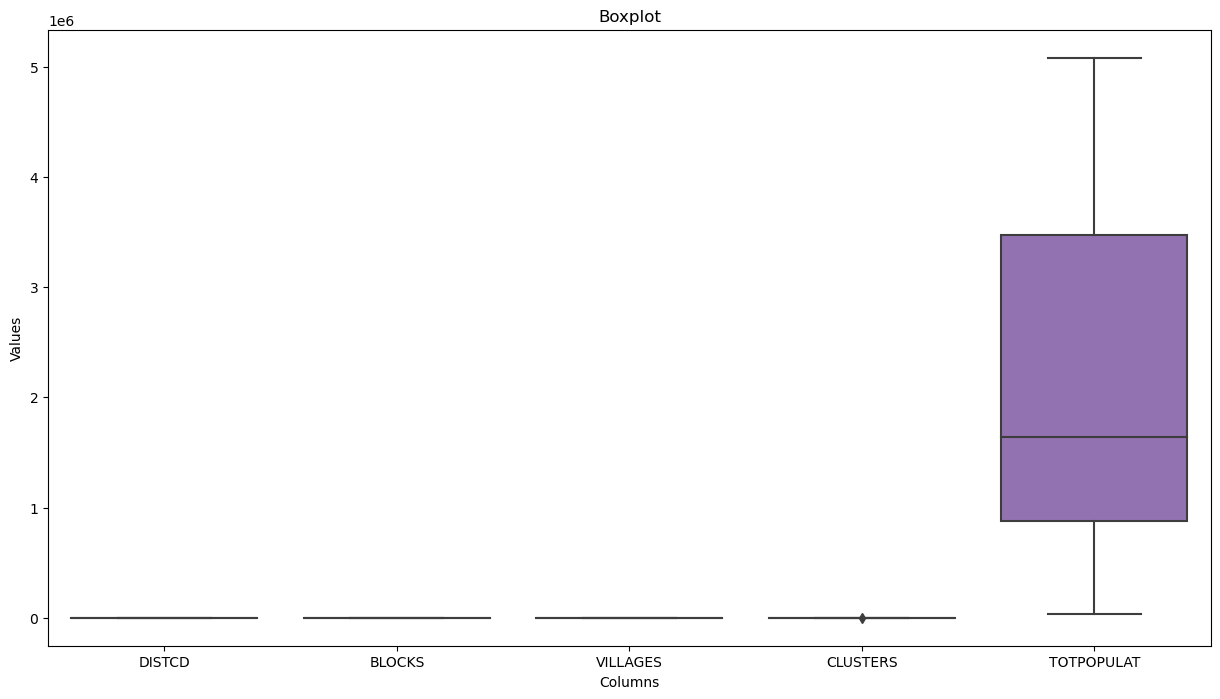

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

## g. Determine quartiles and remove outliers

In [12]:
for col in data2.columns:
    q1=data2[col].quantile(0.25)
    q3=data2[col].quantile(0.75)
    iqr=q3-q1
    low=q1-(1.5*iqr)
    high=q3+(1.5*iqr)
    data2 = data2.loc[(data2[col] > low) & (data2[col] < high)]
    
print(data2)

    BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT
0       13       391       104      875564
1       18       678       144     1015503
2        8        94        65     1269751
3       15      1150       266      518844
4       19      1785       358     1507223
5        4       168        53       31528
6       12      1044       143     3487882
7        5       332        46      992289
8        6       666        79     2026831
9       20        84        20     1054686
10       6       662        61      329686
11       9       809        78      391114
12       3       537        46      236857
13       4       279        43      558890
14       6       431        75     1136784
15       6       591        80     1214162
16       9       224         9     3651261
17       6        80         6      883418
18       6       133         6     2240749
20       7       994       284     1779650
21       7       866       293     2367745
22      14      1357       127     3464228
23      12 

## h. Calculate correlations and visualize them with a heatmap.


<Axes: >

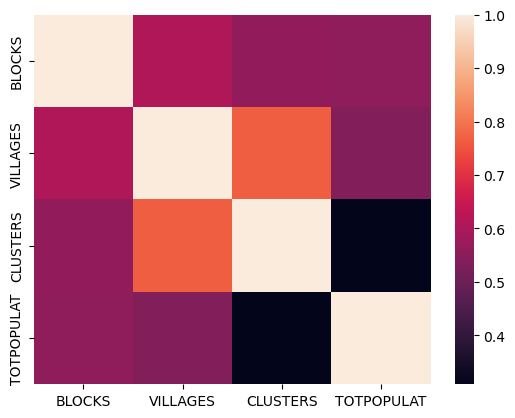

In [13]:
sns.heatmap(data2.corr())

## i. Normalize the various features of the given datasets. (MinMaxScaler)

In [14]:
normal=MinMaxScaler()
normalized=normal.fit_transform(data2)
data2=pd.DataFrame(normalized, columns= data2.columns)

In [15]:
data2

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,0.416667,0.169114,0.278409,0.167092
1,0.625000,0.325177,0.392045,0.194795
2,0.208333,0.007613,0.167614,0.245128
3,0.500000,0.581838,0.738636,0.096473
4,0.666667,0.927134,1.000000,0.292139
5,0.041667,0.047852,0.133523,0.000000
6,0.375000,0.524198,0.389205,0.684245
7,0.083333,0.137031,0.113636,0.190199
8,0.125000,0.318651,0.207386,0.395005
9,0.708333,0.002175,0.039773,0.202552


## j. Arrange correlation values for each attribute in ascending order.

In [16]:
corr_mat = data2.corr(method='pearson') 
sorted_mat = corr_mat.unstack().sort_values() 

In [17]:
sorted_mat

CLUSTERS    TOTPOPULAT    0.308325
TOTPOPULAT  CLUSTERS      0.308325
VILLAGES    TOTPOPULAT    0.537881
TOTPOPULAT  VILLAGES      0.537881
BLOCKS      TOTPOPULAT    0.559485
TOTPOPULAT  BLOCKS        0.559485
BLOCKS      CLUSTERS      0.562097
CLUSTERS    BLOCKS        0.562097
BLOCKS      VILLAGES      0.605569
VILLAGES    BLOCKS        0.605569
            CLUSTERS      0.765167
CLUSTERS    VILLAGES      0.765167
BLOCKS      BLOCKS        1.000000
VILLAGES    VILLAGES      1.000000
CLUSTERS    CLUSTERS      1.000000
TOTPOPULAT  TOTPOPULAT    1.000000
dtype: float64

# Question 6

## a. Scatter plots with coloured points and adjustable sizes using columns 
## (1) col1, col2

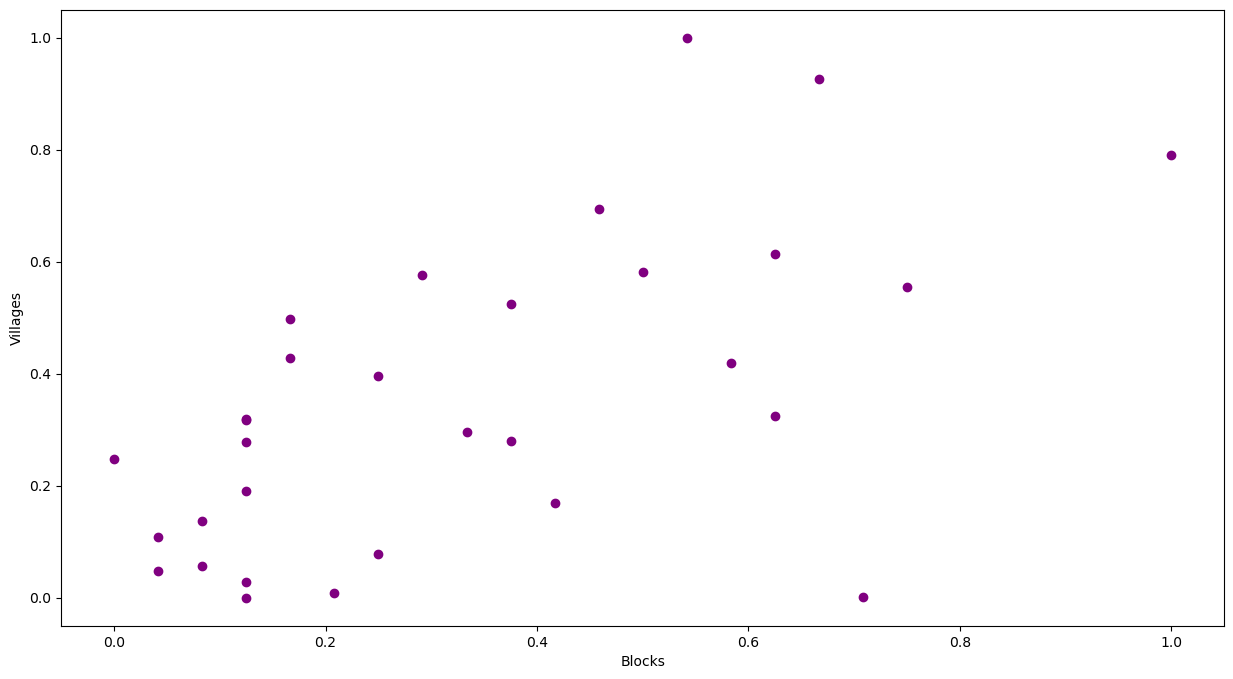

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(data2['BLOCKS'],data2['VILLAGES'],color='purple')
plt.xlabel('Blocks')
plt.ylabel('Villages')
plt.show()

## (2) col3, col4 

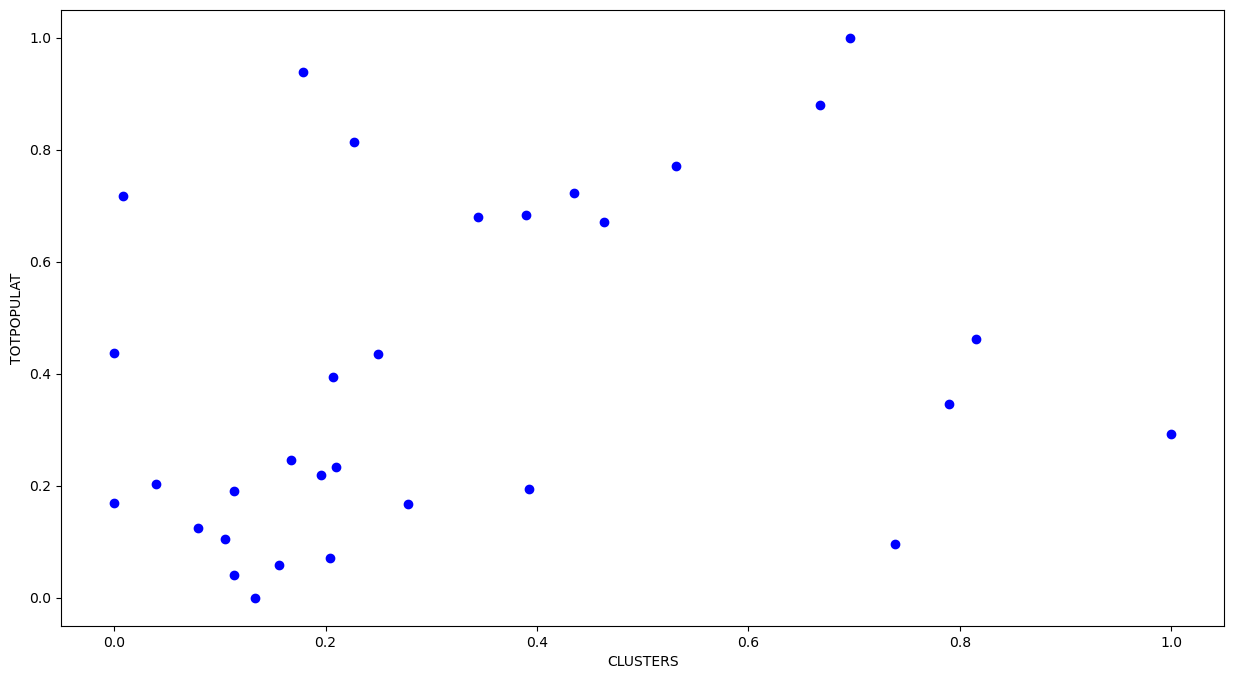

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(data2['CLUSTERS'],data2['TOTPOPULAT'],color='blue')
plt.xlabel('CLUSTERS')
plt.ylabel('TOTPOPULAT')
plt.show()

## b. Line charts for columns 
## (1) col1, col2

<Axes: xlabel='BLOCKS', ylabel='VILLAGES'>

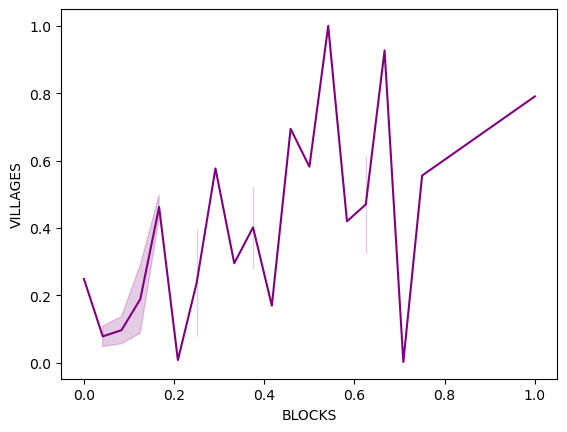

In [21]:
sns.lineplot(x=data2['BLOCKS'],y=data2['VILLAGES'],color='purple')

## (2) col3, col4 

<Axes: xlabel='CLUSTERS', ylabel='TOTPOPULAT'>

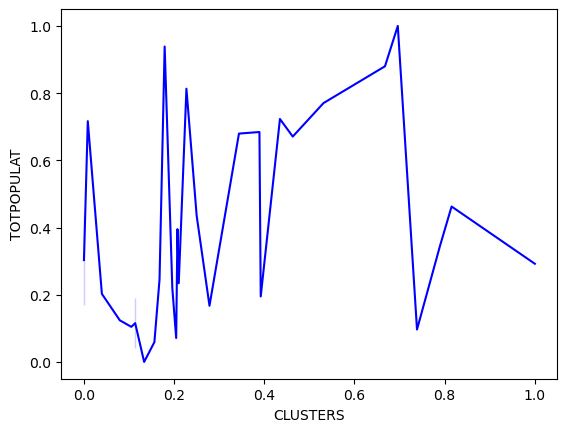

In [23]:
sns.lineplot(x=data2['CLUSTERS'],y=data2['TOTPOPULAT'],color='blue')

## c. Bar charts representing columns (1) col1, col2 

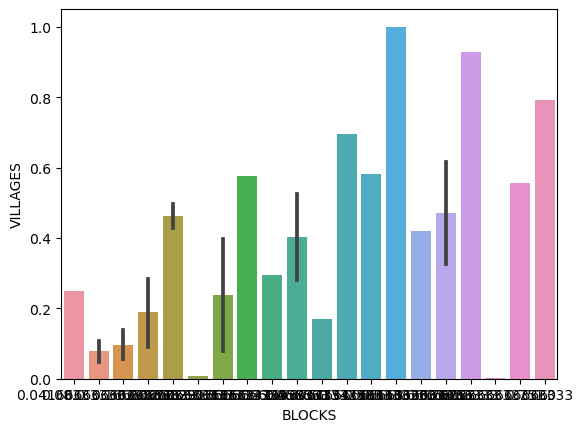

In [24]:
sns.barplot(x='BLOCKS', y='VILLAGES',data=data2)
plt.show()

## (2) col3, col4 

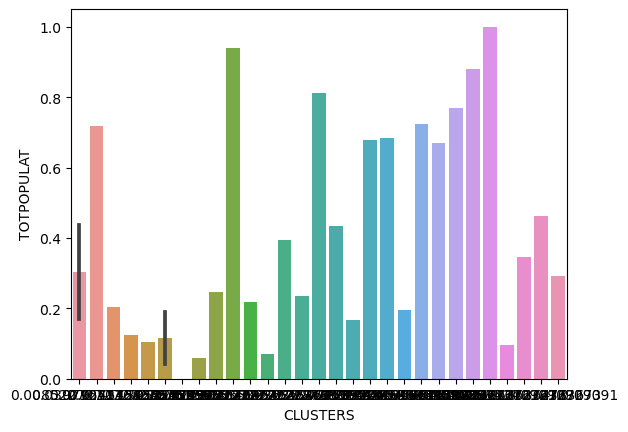

In [25]:
sns.barplot(x='CLUSTERS', y='TOTPOPULAT',data=data2)
plt.show()

## d. Histograms to depict the dataset's distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


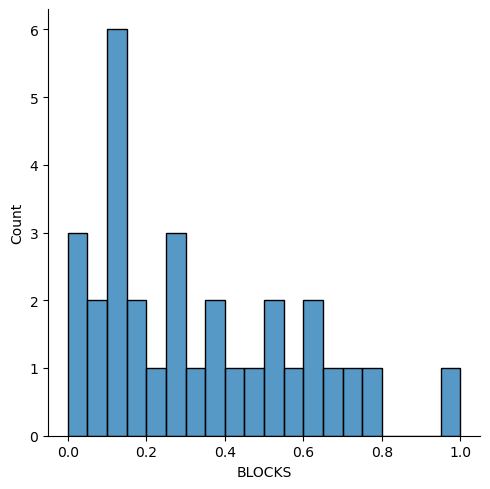

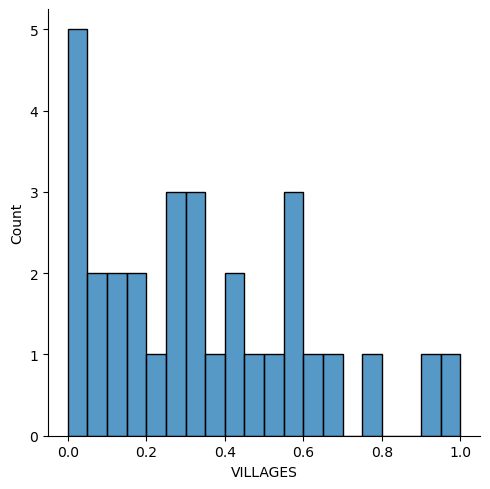

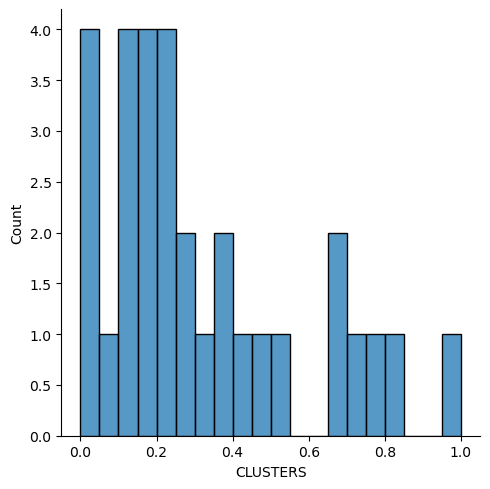

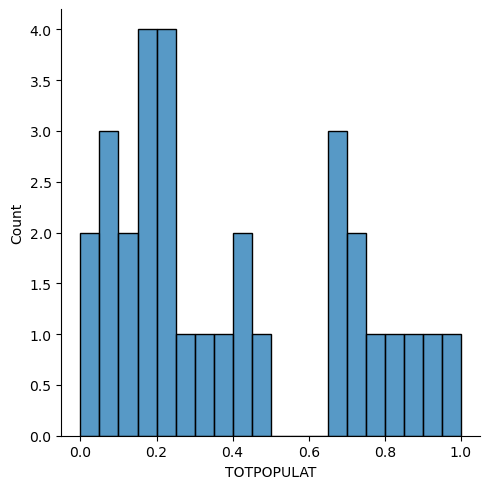

In [26]:
for col in data2.columns:
    sns.displot(data2, x=col, bins=20)

In [28]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook


col1 = 'BLOCKS'
col2 = 'VILLAGES'

output_notebook()

p = figure(title=f'Interactive Scatter Plot of {col1} vs {col2}', 
           x_axis_label=col1, y_axis_label=col2,
           tools='pan,box_zoom,reset,hover,save')

scatter = p.circle(x=data2[col1], y=data2[col2], size=8, color='red', alpha=0.7)

hover = HoverTool()
hover.tooltips = [(f'{col1}', f'@{col1}'), (f'{col2}', f'@{col2}')]
p.add_tools(hover)

show(p)


Loading BokehJS ...

In [30]:
from bokeh.io import curdoc
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Button, Slider, CheckboxGroup, RadioGroup
from bokeh.layouts import column, row

source = ColumnDataSource(data2)

p = figure(title="Interactive Scatter Plot", x_axis_label='BLOCKS', y_axis_label='VILLAGES')
scatter = p.circle(x='BLOCKS', y='VILLAGES', source=source, size=8, color='blue', alpha=0.7)

hover = HoverTool()
hover.tooltips = [("BLOCKS", "@BLOCKS"), ("VILLAGES", "@VILLAGES")]
p.add_tools(hover)

button = Button(label="Randomize Data", button_type="success")
slider = Slider(title="Size", value=8, start=1, end=20, step=1)
checkbox_group = CheckboxGroup(labels=["Show Scatter Plot"], active=[0])
radio_group = RadioGroup(labels=["Blue", "Red"], active=0)

def update_plot():
    scatter.glyph.size = slider.value

button.on_click(update_plot)
slider.on_change('value', lambda attr, old, new: update_plot())

layout = column(
    row(button, slider),
    row(checkbox_group, radio_group),
    p
)

curdoc().add_root(layout)
show(layout, notebook_handle=True)


You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [33]:
import plotly.graph_objects as px 
  
plot = px.Figure(data=[px.Scatter( 
    x=data2['BLOCKS'], 
    y=data2['VILLAGES'], 
    mode='markers',) 
]) 
  
plot.update_layout( 
    updatemenus=[ 
        dict( 
            buttons=list([ 
                dict( 
                    args=["type", "scatter"], 
                    label="Scatter Plot", 
                    method="restyle"
                ), 
                dict( 
                    args=["type", "bar"], 
                    label="Bar Chart", 
                    method="restyle"
                ) 
            ]), 
            direction="down", 
        ), 
    ] 
) 
  
plot.show() 

In [34]:


np.random.seed(42) 

random_x = np.random.randint(1, 101, 100) 
random_y = np.random.randint(1, 101, 100) 

x = data2['TOTPOPULAT']

plot = px.Figure(data=[px.Bar( 
    name='BLOCKS', 
    x=x, 
    y=data2['BLOCKS'] 
), 
    px.Bar( 
    name='VILLAGES', 
    x=x, 
    y=data2['VILLAGES'] 
) 
]) 


plot.update_layout( 
    updatemenus=[ 
        dict( 
            type="buttons", 
            direction="left", 
            buttons=list([ 
                dict(label="Both", 
                    method="update", 
                    args=[{"visible": [True, True]}, 
                        {"title": "Both"}]), 
                dict(label="BLOCKS", 
                    method="update", 
                    args=[{"visible": [True, False]}, 
                          {"title": "Data 1", 
                          }]), 
                dict(label="VILLAGES", 
                     method="update", 
                     args=[{"visible": [False, True]}, 
                           {"title": "Data 2", 
                           }]), 
            ]), 
        ) 
    ]) 

plot.show() 